# Airbnb in Paris: geographic data visualization and other ideas

This notebook is inteded to explore the distriution of airbnbs in Paris. Data are available at http://insideairbnb.com . 
So far, I concentrate on data visualization and try to learn to use the libraries geopandas and geoplot for data visualisation. I start with some simple trends such as price/district, and review score/district. At the end I list some open directions to dig 

In [90]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import glob
import math


import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt



# Import, explore and clean airbnb data

### Uniform format for a different dataset. 
temp = pd.read_csv('data/paris_by_year/listings_large_2018-06-01.csv')
ex = pd.read_csv('data/paris_by_year/tomslee_airbnb_paris_1478_2017-07-25.csv')
cols = ex.columns.values
all_cols = temp.columns.values
cols_dict = {'id':'room_id', 'scrape_id':'survey_id','neighbourhood':'neighborhood' ,
 'host_neighbourhood':'borough', 'review_scores_rating':'overall_satisfaction',
 'minimum_nights':'minstay','calendar_last_scraped':'last_modified', 
             'country_code':'location',
            'number_of_reviews':'reviews'}
temp=temp.rename(columns=cols_dict)
temp_small = temp[cols]
def score_to_stars(score):
    if math.isnan(score):
        return score
    else:
        n=score/20
        return round(n * 2) / 2

temp_small['overall_satisfaction']=temp_small.overall_satisfaction.apply(score_to_stars)
temp_small.to_csv('tomslee_airbnb_paris_2018-06-01.csv')

In [91]:
#folder = 'data/paris_by_year/'
#file = '*.csv'

path='data/paris_by_year/*.csv'
all_files = glob.glob(path)
#    df_temp = pd.read_csv(path)

def get_date(s1):
    s2 = '20'
    date = s1[s1.index(s2) + len(s2)-2:len(s1)-7]
    return date
   
def all_data(files):
    data_list = []
    for fname in files:
        my_df = pd.read_csv(fname)
        my_df['date_taken'] = get_date(fname)
        data_list.append(my_df)
    df_all = pd.concat(data_list, ignore_index=True, axis=0)
    return df_all



In [3]:
df_large = all_data(all_files)

In [4]:
df = df_large.drop(columns=['Unnamed: 0','city','country','survey_id','borough' ], axis=1)
df.shape

(898359, 18)

In [5]:
df.head()

,accommodates,bathrooms,bedrooms,date_taken,host_id,last_modified,latitude,location,longitude,minstay,name,neighborhood,overall_satisfaction,price,property_type,reviews,room_id,room_type
0,2.0,NaN,NaN,2013-11,2883.0,2013-12-05 01:06:15,48.852169,NaN,2.347332,1.0,NaN,Sorbonne,4.0,119,NaN,26,2623,Private room
1,2.0,NaN,NaN,2013-11,3416.0,2013-12-01 21:27:35,48.883100,NaN,2.334202,2.0,NaN,Saint-Georges,5.0,74,NaN,37,3024,Entire home/apt
2,2.0,NaN,1.0,2013-11,3631.0,2013-12-01 22:03:16,48.833494,NaN,2.318518,2.0,NaN,Plaisance,NaN,126,NaN,0,3109,Entire home/apt
3,2.0,NaN,NaN,2013-11,6792.0,2013-12-01 21:28:01,48.865283,NaN,2.371150,3.0,NaN,Folie-Méricourt,5.0,147,NaN,2,4886,Entire home/apt
4,4.0,NaN,1.0,2013-11,6792.0,2013-12-06 15:15:23,48.864090,NaN,2.356515,3.0,NaN,Arts-et-Metiers,4.5,208,NaN,5,4890,Entire home/apt


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898359 entries, 0 to 898358
Data columns (total 18 columns):
accommodates            890620 non-null float64
bathrooms               60421 non-null float64
bedrooms                895469 non-null float64
date_taken              898359 non-null object
host_id                 898070 non-null float64
last_modified           898359 non-null object
latitude                898359 non-null float64
location                323227 non-null object
longitude               898359 non-null float64
minstay                 381974 non-null float64
name                    196105 non-null object
neighborhood            896720 non-null object
overall_satisfaction    730857 non-null float64
price                   898349 non-null object
property_type           196414 non-null object
reviews                 898359 non-null int64
room_id                 898359 non-null int64
room_type               898058 non-null object
dtypes: float64(8), int64(2), object(8

List of neighborhoods

In [44]:
#cols=['I Arrondissement','II Arrondissement','III Arrondissement' , 'IV Arrondissement',
#      'V Arrondissement', 'VI Arrondissement', 'VII Arrondissement', 'VIII Arrondissement',
#     'IX Arrondissement','X Arrondissement', 'XI Arrondissement', 'XII Arrondissement',
#     'XIII Arrondissement', 'XIV Arrondissement', 'XV Arrondissement', 'XVI Arrondissement',
#     'XVII Arrondissement', 'XVIII Arrondissement', 'XIX Arrondissement', 'XX Arrondissement']
#for c in cols:
# df = df[df.neighborhood != c]

#df = df.dropna(subset=['neighborhood'], axis=0)

In [6]:
quar_list_airbnb = df.neighborhood.unique()
quar_list_airbnb

array(['Sorbonne', 'Saint-Georges', 'Plaisance', 'Folie-Méricourt',
       'Arts-et-Metiers', 'Notre-Dame', 'Halles', 'Grandes-Carrières',
       'Saint-Merri', 'Faubourg-Montmartre', 'Enfants-Rouges',
       'Sainte-Marguerite', 'Père-Lachaise', 'Grenelle', 'Saint-Ambroise',
       'Saint-Gervais', 'Saint-Avoye', 'Clignancourt', 'Saint-Victor',
       'Maison-Blanche', 'Villette', 'Arsenal', 'Belleville', 'Gare',
       'Combat', 'Amérique', 'Charonne', 'Hôpital-Saint-Louis',
       'Roquette', 'Porte-Saint-Denis', 'Salpêtrière', 'Archives',
       'Porte-Saint-Martin', 'Pont-de-Flandre', 'Rochechouart',
       'Madeleine', 'Goutte-dOr', 'St-Germain-lAuxerrois', 'Val-de-Grace',
       'Invalides', 'Jardin-des-Plantes', 'Bel-Air', 'Bonne-Nouvelle',
       'Saint-Thomas-dAquin', 'Petit-Montrouge', 'Muette', 'Europe',
       'Palais-Royal', 'Epinettes', 'Notre-Dame-des-Champs',
       'Saint-Vincent-de-Paul', 'Batignolles', 'Quinze-Vingts',
       'Porte-Dauphine', 'Chaillot', 'Croulebar

In Paris, number of arrondissment is used, not name. convert names->numbers

In [98]:
n_to_arr_dict = {'Quartier Latin':5,
                 'Austerlitz':13,
                 'X Arrondissement':10,
                 'Clignancourt':18,
                 'Roquette':11,
                 'Belleville':20,
                 'Grandes-Carrières':18,
                'XVI Arrondissement':16,
                 'XVII Arrondissement':17,
                 'XV Arrondissement':15,
                 'XIII Arrondissement':13,
                 'XIV Arrondissement':14,
                 'XX Arrondissement':20,
                 'XIX Arrondissement':19,
                 'XII Arrondissement':12,
                 'XVIII Arrondissement':18,
                 'IX Arrondissement':9,
                 'VI Arrondissement':6,
                 'I Arrondissement':1,
                 'V Arrondissement':5,
                'Buttes-Montmartre':18,
                 'Popincourt':11,
                 'Vaugirard':15,
                 'Entrepôt':10,
                 'Batignolles-Monceau':17,
                 'Ménilmontant':20,
                 'Buttes-Chaumont':19,
                 'Passy':16,
                 'Temple':3,
                 'Opéra':9,
                 'Reuilly':12,
                 'Observatoire':14,
                 'Gobelins':13,
                 'Panthéon':5,
                 'Hôtel-de-Ville':4,
                 'Bourse':2,
                 'Luxembourg':6,
                 'Palais-Bourbon':7,
                 'Élysée':8,
                 'Louvre':1
}

#df['arrondissement']=df.neighbourhood_cleansed.map(n_to_arr_dict)

In [8]:
# Check missing

df.isnull().sum()

accommodates              7739
bathrooms               837938
bedrooms                  2890
date_taken                   0
host_id                    289
last_modified                0
latitude                     0
location                575132
longitude                    0
minstay                 516385
name                    702254
neighborhood              1639
overall_satisfaction    167502
price                       10
property_type           701945
reviews                      0
room_id                      0
room_type                  301
dtype: int64

In [9]:
# price is a string (!!?!) convert to int
import re

def conv_line(x):
    
    if type(x)==str:
        return float(re.findall(r'\d+', x)[0])
    else: 
        if math.isnan(x):
            return x
        else: return float(x)

    
type(df.price[1])
df_large.price[:2]

df.price = df.price.apply(conv_line)
type(df.price[1])
df.price[:2]

float

0    119
1     74
Name: price, dtype: object

numpy.float64

0    119.0
1     74.0
Name: price, dtype: float64

# Geographical data

### Quartiers de Paris

In [10]:
quar_bg_json = gpd.read_file('data/quartier_paris.geojson')

quar_bg_json.head(2)
quar_bg_json.shape
quar_list = quar_bg_json.l_qu.values


,n_sq_qu,perimetre,objectid,longueur,c_qu,surface,n_sq_ar,c_quinsee,l_qu,c_ar,geometry
0,750000010,2139.625388,50,2139.535591,10,271750.323937,750000003,7510302,Enfants-Rouges,3,"POLYGON ((2.367101341254551 48.86162755885409,..."
1,750000016,3283.163371,56,3282.999717,16,378252.153674,750000004,7510404,Notre-Dame,4,"POLYGON ((2.361313701339139 48.84858030437791,..."


(80, 11)

In [11]:
import geopy.distance

coords_1 = (48.876733, 2.340038)
coords_2 = (48.881508, 2.326565)

paris_center = (48.864716, 2.349014)

geopy.distance.vincenty(coords_2, paris_center).km

2.4898017322944015

In [12]:
quar_bg_json['latitude']= quar_bg_json.geometry.centroid.y
quar_bg_json['longitude']= quar_bg_json.geometry.centroid.x

In [13]:
def inside_polygon(x, y, points):
    """
    Return True if a coordinate (x, y) is inside a polygon defined by
    a list of verticies [(x1, y1), (x2, x2), ... , (xN, yN)].

    Reference: http://www.ariel.com.au/a/python-point-int-poly.html
    """
    n = len(points)
    inside = False
    p1x, p1y = points[0]
    for i in range(1, n + 1):
        p2x, p2y = points[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xinters:
                        inside = not inside
        p1x, p1y = p2x, p2y
    return inside

In [14]:

def assign_quartier(lat, lon , quar_df, name_col):
    
    point = Point(lat, lon)
    for index, row in quar_df.iterrows():
        polygon = row['geometry']
        c_list = [(c[1], c[0]) for c in polygon.exterior.coords]
        
        inside = inside_polygon(lat, lon, c_list)
        
        if inside:
            return row[name_col]
            break
            


In [15]:
# Test
%time
line=df[df.neighborhood=='Buttes-Chaumont - Belleville'].iloc[np.random.randint(1,10),:]
line.neighborhood
q = assign_quartier(line.latitude, line.longitude, quar_bg_json, 'l_qu')

q

CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 43.9 µs


'Buttes-Chaumont - Belleville'

'Combat'

In [96]:
10*df_sample.shape[0]*10**-6*1000/60#/60

0.8333333333333333

In [16]:
df_sample = df.sample(5000)

In [17]:
%%time
df_sample['regular_neighborhood'] = df_sample.apply(lambda row: assign_quartier(row.latitude ,row.longitude, quar_bg_json, 'l_qu' ), axis=1)



CPU times: user 2min 15s, sys: 2.73 s, total: 2min 18s
Wall time: 3min 42s


In [84]:
%%time
# tempo stimato ~ 2h50
df['regular_neighborhood'] = df.apply(lambda row: assign_quartier(row.latitude ,row.longitude, quar_bg_json, 'l_qu' ), axis=1)
df.to_csv('airbnb_paris_2013_2018_full.csv')

CPU times: user 2h 31min 52s, sys: 41.8 s, total: 2h 32min 34s
Wall time: 2h 32min 38s


In [24]:
df_sample.head()

,accommodates,bathrooms,bedrooms,date_taken,host_id,last_modified,latitude,location,longitude,minstay,name,neighborhood,overall_satisfaction,price,property_type,reviews,room_id,room_type,regular_neighborhood
290888,2.0,NaN,1.0,2016-08,43535912.0,2016-08-10 19:09:54.697128,48.844350,NaN,2.295040,2.0,NaN,Grenelle,NaN,69.0,NaN,0,13860694,Entire home/apt,Grenelle
622121,2.0,NaN,0.0,2017-04,35364848.0,2017-04-16 06:10:31.352388,48.862213,0101000020E6100000DE02098A1FE30240D097DEFE5C6E...,2.360900,NaN,NaN,Enfants-Rouges,0.0,43.0,NaN,0,6904558,Entire home/apt,Enfants-Rouges
385545,2.0,NaN,1.0,2017-01,13429162.0,2017-01-01 23:21:26.976566,48.895755,NaN,2.322800,NaN,NaN,Epinettes,5.0,52.0,NaN,16,15150496,Private room,Epinettes
669589,2.0,NaN,1.0,2017-04,6147063.0,2017-04-27 06:19:47.372961,48.869708,0101000020E61000002EFEB627484C0340E8887C97526F...,2.412247,NaN,NaN,Saint-Fargeau,5.0,31.0,NaN,4,17968815,Private room,Saint-Fargeau
661431,6.0,NaN,2.0,2017-04,4237797.0,2017-04-26 19:46:41.220674,48.870525,0101000020E6100000802C4487C0510240DAACFA5C6D6F...,2.289918,NaN,NaN,Chaillot,NaN,449.0,NaN,0,7398784,Entire home/apt,Chaillot


In [35]:
df_sample[df_sample['regular_neighborhood'].isnull()]

,accommodates,bathrooms,bedrooms,date_taken,host_id,last_modified,latitude,location,longitude,minstay,name,neighborhood,overall_satisfaction,price,property_type,reviews,room_id,room_type,regular_neighborhood
889811,1.0,1.0,0.0,2018-06,29671382.0,2018-06-08,48.881896,FR,2.275968,1.0,Neuilly Porte Maillot ~ Studio meublé,NaN,NaN,40.0,Apartment,0,22580785,Entire home/apt,None
883062,2.0,1.0,1.0,2018-06,91612254.0,2018-06-08,48.902079,FR,2.318819,3.0,"Un pied-à-terre, court séjour à Paris, 1 à 2 p...",NaN,NaN,30.0,Apartment,1,19950700,Shared room,None
896891,2.0,1.0,0.0,2018-06,11118041.0,2018-06-08,48.847006,FR,2.241907,1.0,Charmant studio à Roland Garros proche Paris 16e,XVI Arrondissement,NaN,45.0,Apartment,0,25232895,Entire home/apt,None


In [38]:
df_sample = df_sample.dropna(subset=['regular_neighborhood'])

In [39]:
print(np.sort(quar_list))

['Amérique' 'Archives' 'Arsenal' 'Arts-et-Metiers' 'Auteuil' 'Batignolles'
 'Bel-Air' 'Belleville' 'Bercy' 'Bonne-Nouvelle' 'Chaillot'
 'Champs-Elysées' 'Charonne' "Chaussée-d'Antin" 'Clignancourt' 'Combat'
 'Croulebarbe' 'Ecole-Militaire' 'Enfants-Rouges' 'Epinettes' 'Europe'
 'Faubourg-Montmartre' 'Faubourg-du-Roule' 'Folie-Méricourt' 'Gaillon'
 'Gare' "Goutte-d'Or" 'Grandes-Carrières' 'Grenelle' 'Gros-Caillou'
 'Halles' 'Hôpital-Saint-Louis' 'Invalides' 'Jardin-des-Plantes'
 'Javel 15Art' 'La Chapelle' 'Madeleine' 'Mail' 'Maison-Blanche' 'Monnaie'
 'Montparnasse' 'Muette' 'Necker' 'Notre-Dame' 'Notre-Dame-des-Champs'
 'Odeon' 'Palais-Royal' 'Parc-de-Montsouris' 'Petit-Montrouge' 'Picpus'
 'Place-Vendôme' 'Plaine de Monceaux' 'Plaisance' 'Pont-de-Flandre'
 'Porte-Dauphine' 'Porte-Saint-Denis' 'Porte-Saint-Martin' 'Père-Lachaise'
 'Quinze-Vingts' 'Rochechouart' 'Roquette' 'Saint-Ambroise'
 'Saint-Fargeau' 'Saint-Georges' 'Saint-Germain-des-Prés' 'Saint-Gervais'
 'Saint-Lambert' 'Saint

In [40]:
quar_list_airbnb_new = df_sample.regular_neighborhood.unique()

print(quar_list_airbnb_new)

['Grenelle' 'Enfants-Rouges' 'Epinettes' 'Saint-Fargeau' 'Chaillot'
 'Clignancourt' 'Grandes-Carrières' 'Plaisance' 'Roquette' 'Mail'
 'Faubourg-Montmartre' 'Picpus' 'Monnaie' 'Belleville' 'Halles'
 'Notre-Dame' 'Gros-Caillou' 'Sorbonne' 'Jardin-des-Plantes'
 'Porte-Saint-Denis' 'Salpêtrière' 'Saint-Lambert' 'Odeon'
 'Ecole-Militaire' 'Combat' 'Hôpital-Saint-Louis' 'Auteuil' 'Gaillon'
 'Quinze-Vingts' 'Saint-Merri' 'Villette' 'Bonne-Nouvelle' 'Saint-Georges'
 'Saint-Vincent-de-Paul' 'Arsenal' "Chaussée-d'Antin" 'Père-Lachaise'
 'Porte-Dauphine' 'Archives' 'Rochechouart' 'Batignolles' 'Saint-Ambroise'
 'Bercy' "Goutte-d'Or" 'Folie-Méricourt' 'Vivienne' 'Charonne'
 'Maison-Blanche' 'Sainte-Marguerite' 'Parc-de-Montsouris'
 "Saint-Thomas-d'Aquin" 'Ternes' 'Muette' 'Necker' 'Saint-Victor'
 'Javel 15Art' 'Amérique' 'La Chapelle' 'Europe' 'Notre-Dame-des-Champs'
 'Madeleine' 'Croulebarbe' 'Porte-Saint-Martin' 'Bel-Air'
 'Plaine de Monceaux' 'Petit-Montrouge' "St-Germain-l'Auxerrois"
 'Faubou

In [41]:
for q in quar_list_airbnb_new:
    if q not in quar_list:
        print(q)

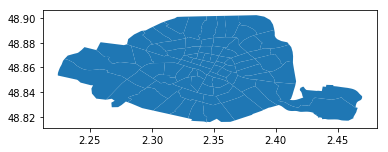

In [7]:
quar_bg_json.plot()

### Arrondissements de Paris

In [92]:
arr_bg_json = gpd.read_file('paris_bg_maps/arrondissements/arrondissements.geojson')
arr_bg_json = arr_bg_json.sort_values(by='c_arinsee').reset_index(drop=True)

arr_bg_json = arr_bg_json.to_crs(epsg=4326)


In [93]:
arr_bg_json.head(2)

,n_sq_co,perimetre,objectid,l_ar,surface,longueur,n_sq_ar,l_aroff,c_arinsee,c_ar,geometry
0,750001537,6054.936862,1,1er Ardt,1.824613e+06,6054.680862,750000001,Louvre,75101,1,"POLYGON ((2.328007329038849 48.86991742140715,..."
1,750001537,4554.104360,2,2ème Ardt,9.911537e+05,4553.938764,750000002,Bourse,75102,2,"POLYGON ((2.351518483670821 48.8644258050741, ..."


In [94]:
line=df.iloc[1,:]
line.neighborhood

assign_quartier(line.latitude, line.longitude, arr_bg_json, 'l_aroff')

'Saint-Georges'

'Opéra'

In [77]:
%%time

df_sample['arrondissement'] = df_sample.apply(lambda row: assign_quartier(row.latitude ,row.longitude,arr_bg_json, 'l_aroff' ), axis=1)

df_sample['arrondissement_num']=df_sample.arrondissement.map(n_to_arr_dict)

CPU times: user 46.3 s, sys: 917 ms, total: 47.2 s
Wall time: 1min 5s


In [78]:
df_sample.head()

,accommodates,bathrooms,bedrooms,date_taken,host_id,last_modified,latitude,location,longitude,minstay,...,overall_satisfaction,price,property_type,reviews,room_id,room_type,regular_neighborhood,regular_neighborhood_num,arrondissement,arrondissement_num
290888,2.0,NaN,1.0,2016-08,43535912.0,2016-08-10 19:09:54.697128,48.844350,NaN,2.295040,2.0,...,NaN,69.0,NaN,0,13860694,Entire home/apt,Grenelle,59,Vaugirard,15
622121,2.0,NaN,0.0,2017-04,35364848.0,2017-04-16 06:10:31.352388,48.862213,0101000020E6100000DE02098A1FE30240D097DEFE5C6E...,2.360900,NaN,...,0.0,43.0,NaN,0,6904558,Entire home/apt,Enfants-Rouges,10,Temple,3
385545,2.0,NaN,1.0,2017-01,13429162.0,2017-01-01 23:21:26.976566,48.895755,NaN,2.322800,NaN,...,5.0,52.0,NaN,16,15150496,Private room,Epinettes,68,Batignolles-Monceau,17
669589,2.0,NaN,1.0,2017-04,6147063.0,2017-04-27 06:19:47.372961,48.869708,0101000020E61000002EFEB627484C0340E8887C97526F...,2.412247,NaN,...,5.0,31.0,NaN,4,17968815,Private room,Saint-Fargeau,78,Ménilmontant,20
661431,6.0,NaN,2.0,2017-04,4237797.0,2017-04-26 19:46:41.220674,48.870525,0101000020E6100000802C4487C0510240DAACFA5C6D6F...,2.289918,NaN,...,NaN,449.0,NaN,0,7398784,Entire home/apt,Chaillot,64,Passy,16


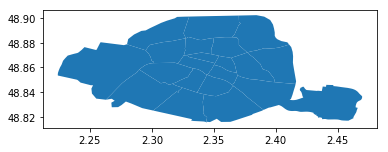

In [179]:
arr_bg_json.plot()

In [95]:
df = pd.read_csv('airbnb_paris_2013_2018_half_full.csv')

In [97]:
df.head()

,Unnamed: 0,accommodates,bathrooms,bedrooms,date_taken,host_id,last_modified,latitude,location,longitude,minstay,name,neighborhood,overall_satisfaction,price,property_type,reviews,room_id,room_type,regular_neighborhood
0,0,2.0,NaN,NaN,2013-11,2883.0,2013-12-05 01:06:15,48.852169,NaN,2.347332,1.0,NaN,Sorbonne,4.0,119.0,NaN,26,2623,Private room,Sorbonne
1,1,2.0,NaN,NaN,2013-11,3416.0,2013-12-01 21:27:35,48.883100,NaN,2.334202,2.0,NaN,Saint-Georges,5.0,74.0,NaN,37,3024,Entire home/apt,Saint-Georges
2,2,2.0,NaN,1.0,2013-11,3631.0,2013-12-01 22:03:16,48.833494,NaN,2.318518,2.0,NaN,Plaisance,NaN,126.0,NaN,0,3109,Entire home/apt,Plaisance
3,3,2.0,NaN,NaN,2013-11,6792.0,2013-12-01 21:28:01,48.865283,NaN,2.371150,3.0,NaN,Folie-Méricourt,5.0,147.0,NaN,2,4886,Entire home/apt,Folie-Méricourt
4,4,4.0,NaN,1.0,2013-11,6792.0,2013-12-06 15:15:23,48.864090,NaN,2.356515,3.0,NaN,Arts-et-Metiers,4.5,208.0,NaN,5,4890,Entire home/apt,Arts-et-Metiers


In [99]:
%%time

df['arrondissement'] = df.apply(lambda row: assign_quartier(row.latitude ,row.longitude,arr_bg_json, 'l_aroff' ), axis=1)

df['arrondissement_num']=df.arrondissement.map(n_to_arr_dict)
df.to_csv('airbnb_paris_2013_2018_full.csv')

CPU times: user 56min 42s, sys: 18.3 s, total: 57min
Wall time: 56min 57s
